In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/leslie_data.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1725 non-null   int64 
 1   Chan_0_2   1725 non-null   int64 
 2   Chan_1_2   1725 non-null   int64 
 3   timestamp  1725 non-null   object
dtypes: int64(3), object(1)
memory usage: 54.0+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            1         2        13   Thu Mar 30 17:18:33 2023
1            8         5         9   Thu Mar 30 17:19:33 2023
2            5         3         9   Thu Mar 30 17:20:33 2023
3            4         2         5   Thu Mar 30 17:21:33 2023
4            7         5        12   Thu Mar 30 17:22:33 2023
...        ...       ...       ...                        ...
1720        10         5        17   Fri Mar 31 22:05:38 2023
1721         6         6        21   Fri Mar 31 22:06:38 2023
1722         5         2   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1725 non-null   int64 
 1   Chan_0_2   1725 non-null   int64 
 2   Chan_1_2   1725 non-null   int64 
 3   timestamp  1725 non-null   object
dtypes: int64(3), object(1)
memory usage: 54.0+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,1,2,13,2023-03-30 17:18:33
1,8,5,9,2023-03-30 17:19:33
2,5,3,9,2023-03-30 17:20:33
3,4,2,5,2023-03-30 17:21:33
4,7,5,12,2023-03-30 17:22:33


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,1,2,13,2023-03-30 17:18:33
1,8,5,9,2023-03-30 17:19:33
2,5,3,9,2023-03-30 17:20:33
3,4,2,5,2023-03-30 17:21:33
4,7,5,12,2023-03-30 17:22:33


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1725 non-null   datetime64[ns]
 1   Chan_0_1   1725 non-null   int64         
 2   Chan_0_2   1725 non-null   int64         
 3   Chan_1_2   1725 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 67.4 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-30 17:00:00,5.047619,2.809524,10.595238
2023-03-30 18:00:00,5.383333,4.300000,12.633333
2023-03-30 19:00:00,5.533333,3.933333,12.950000
2023-03-30 20:00:00,5.783333,4.333333,13.683333
2023-03-30 21:00:00,5.483333,4.266667,13.266667


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

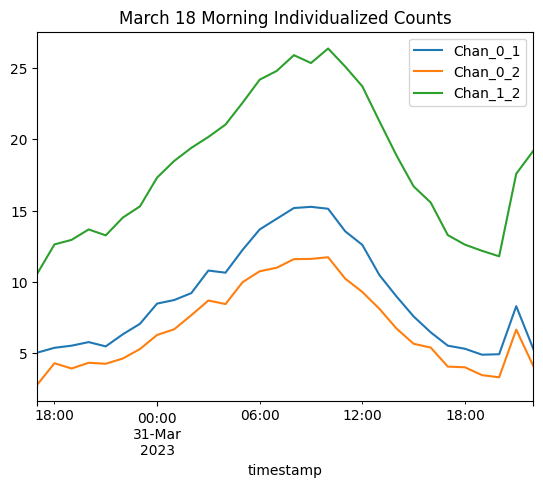

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-30 17:00:00,5.047619,2.809524,10.595238,6.150794
2023-03-30 18:00:00,5.383333,4.300000,12.633333,7.438889
2023-03-30 19:00:00,5.533333,3.933333,12.950000,7.472222
2023-03-30 20:00:00,5.783333,4.333333,13.683333,7.933333
2023-03-30 21:00:00,5.483333,4.266667,13.266667,7.672222


Text(0.5, 1.0, 'Leslie Home March 30 to March 31')

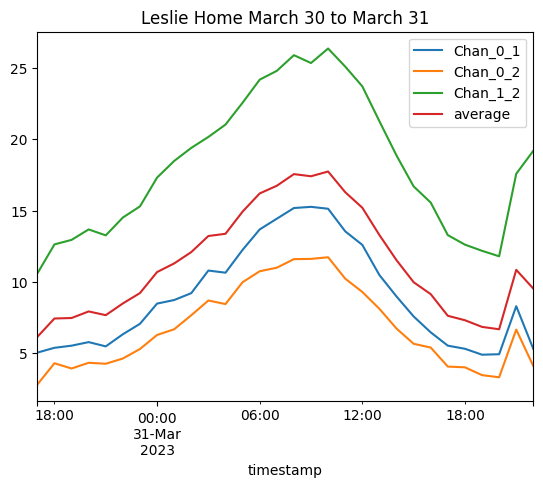

In [13]:
df_morn_counts.plot()
plt.title('Leslie Home March 30 to March 31')
#plt.ylim(0,150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

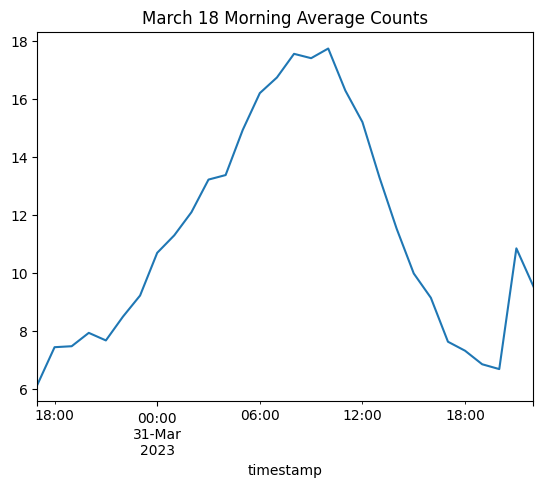

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')